In [25]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [16]:
df = pd.read_parquet("/home/asado/Descargas/Anyone AI/final_sprint/yellow_tripdata_2022-05.parquet")
df.sample(10, random_state=42) #seed of randomness for reproducibility

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
3043622,2,2022-05-27 16:45:16,2022-05-27 16:52:08,1.0,0.90,1.0,N,249,114,1,6.0,1.0,0.5,2.06,0.0,0.3,12.36,2.5,0.0
208456,1,2022-05-03 10:01:56,2022-05-03 10:19:06,1.0,0.80,1.0,N,141,141,2,6.5,2.5,0.5,0.00,0.0,0.3,9.80,2.5,0.0
942942,1,2022-05-09 16:59:46,2022-05-09 17:03:47,1.0,0.70,1.0,N,151,238,1,5.0,3.5,0.5,1.85,0.0,0.3,11.15,2.5,0.0
247636,2,2022-05-03 16:30:52,2022-05-03 16:41:19,1.0,1.72,1.0,N,87,148,1,8.5,1.0,0.5,2.56,0.0,0.3,15.36,2.5,0.0
3052006,2,2022-05-27 18:45:16,2022-05-27 18:53:46,1.0,1.54,1.0,N,42,24,1,8.0,1.0,0.5,1.96,0.0,0.3,11.76,0.0,0.0
1291561,2,2022-05-12 15:22:00,2022-05-12 15:29:22,5.0,1.03,1.0,N,107,234,1,6.5,0.0,0.5,1.00,0.0,0.3,10.80,2.5,0.0
3073378,2,2022-05-27 21:24:03,2022-05-27 21:32:10,4.0,1.19,1.0,N,161,48,1,7.0,0.5,0.5,2.16,0.0,0.3,12.96,2.5,0.0
3423926,2,2022-05-31 18:53:00,2022-05-31 19:03:35,1.0,1.78,1.0,N,163,234,1,9.0,1.0,0.5,2.66,0.0,0.3,15.96,2.5,0.0
3486168,2,2022-05-06 18:40:00,2022-05-06 18:44:00,NaN,0.83,NaN,None,87,45,0,10.0,0.0,0.5,2.00,0.0,0.3,15.30,NaN,NaN
778070,2,2022-05-07 22:12:17,2022-05-07 22:24:17,2.0,1.68,1.0,N,161,107,2,9.5,0.5,0.5,0.00,0.0,0.3,13.30,2.5,0.0


In [17]:
print(f"This dataset is composed of {df.shape[0]} rows and {df.shape[1]} columns")

This dataset is composed of 3588295 rows and 19 columns


In [35]:
df_subset = df.sample(10000, random_state=42) #seed of randomness for reproducibility

In [19]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 3043622 to 1089672
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               10000 non-null  int64         
 1   tpep_pickup_datetime   10000 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  10000 non-null  datetime64[ns]
 3   passenger_count        9633 non-null   float64       
 4   trip_distance          10000 non-null  float64       
 5   RatecodeID             9633 non-null   float64       
 6   store_and_fwd_flag     9633 non-null   object        
 7   PULocationID           10000 non-null  int64         
 8   DOLocationID           10000 non-null  int64         
 9   payment_type           10000 non-null  int64         
 10  fare_amount            10000 non-null  float64       
 11  extra                  10000 non-null  float64       
 12  mta_tax                10000 non-null  float64       
 13

In [20]:
df_subset.isna().sum()/df_subset.shape[0]*100

VendorID                 0.00
tpep_pickup_datetime     0.00
tpep_dropoff_datetime    0.00
passenger_count          3.67
trip_distance            0.00
RatecodeID               3.67
store_and_fwd_flag       3.67
PULocationID             0.00
DOLocationID             0.00
payment_type             0.00
fare_amount              0.00
extra                    0.00
mta_tax                  0.00
tip_amount               0.00
tolls_amount             0.00
improvement_surcharge    0.00
total_amount             0.00
congestion_surcharge     3.67
airport_fee              3.67
dtype: float64

In [21]:
df.nunique()/df.shape[0]*100

VendorID                  0.000111
tpep_pickup_datetime     48.900968
tpep_dropoff_datetime    48.849635
passenger_count           0.000279
trip_distance             0.132960
RatecodeID                0.000195
store_and_fwd_flag        0.000056
PULocationID              0.007218
DOLocationID              0.007274
payment_type              0.000139
fare_amount               0.226821
extra                     0.001700
mta_tax                   0.000362
tip_amount                0.105315
tolls_amount              0.021431
improvement_surcharge     0.000084
total_amount              0.400720
congestion_surcharge      0.000195
airport_fee               0.000084
dtype: float64

In [36]:
df_subset["duration"] = df_subset["tpep_dropoff_datetime"].dt.hour - df_subset["tpep_pickup_datetime"].dt.hour
df_subset = df_subset.drop(["tpep_pickup_datetime", "tpep_dropoff_datetime"], axis=1)

In [32]:
round(df_subset.describe(),2)

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
count,10000.00,9633.00,10000.00,9633.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,9633.00,9633.00,10000.00
mean,1.72,1.41,3.66,1.35,164.59,162.12,1.18,15.26,1.00,0.49,2.88,0.57,0.30,22.23,2.29,0.10,0.08
std,0.48,0.96,4.58,5.10,65.72,70.05,0.50,14.49,1.26,0.09,3.43,2.19,0.05,18.15,0.73,0.34,2.11
min,1.00,0.00,0.00,1.00,1.00,1.00,0.00,-65.50,-4.50,-0.50,-0.01,-13.75,-0.30,-68.55,-2.50,-1.25,-23.00
25%,1.00,1.00,1.15,1.00,132.00,113.00,1.00,7.00,0.00,0.50,1.00,0.00,0.30,12.36,2.50,0.00,0.00
50%,2.00,1.00,2.00,1.00,162.00,162.00,1.00,10.50,0.50,0.50,2.26,0.00,0.30,16.30,2.50,0.00,0.00
75%,2.00,2.00,3.73,1.00,234.00,234.00,1.00,17.00,2.50,0.50,3.50,0.00,0.30,23.76,2.50,0.00,1.00
max,6.00,6.00,59.48,99.00,265.00,265.00,4.00,300.00,8.25,0.50,104.00,86.00,0.30,314.05,2.50,1.25,3.00


Distribución de la variable VendorID


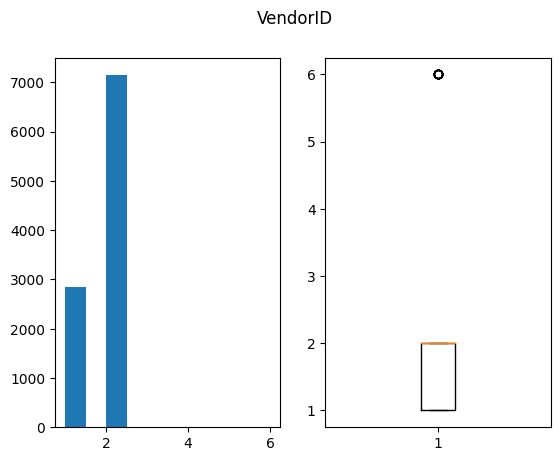

Mode= 2
Mean= 1.7209
Median= 2.0


Distribución de la variable passenger_count


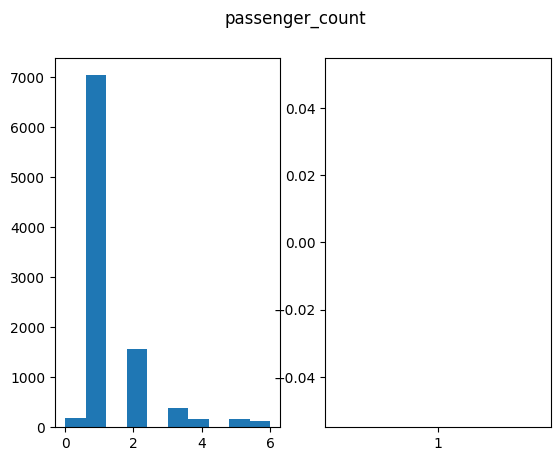

Mode= 1.0
Mean= 1.4101526004360012
Median= 1.0


Distribución de la variable trip_distance


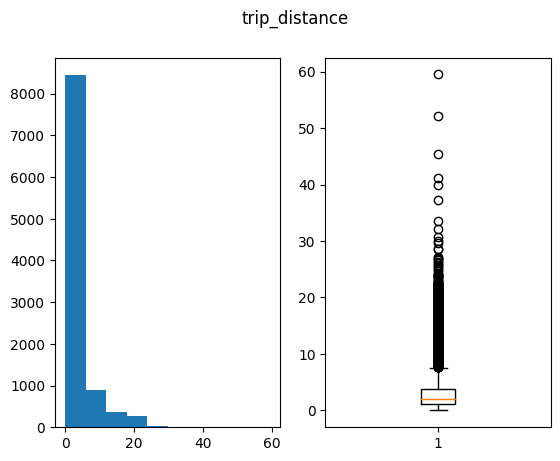

Mode= 0.0
Mean= 3.655668
Median= 2.0


Distribución de la variable RatecodeID


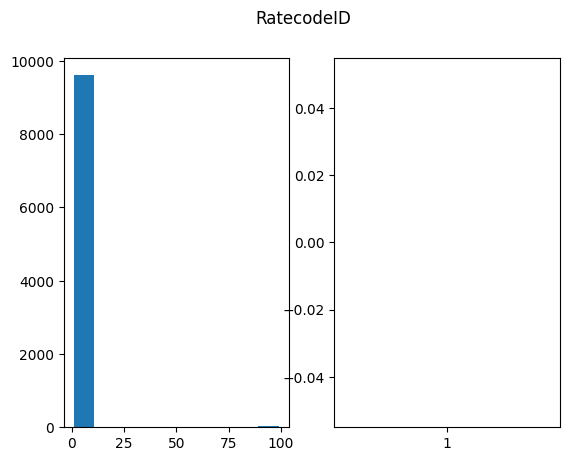

Mode= 1.0
Mean= 1.3535762483130904
Median= 1.0


Distribución de la variable PULocationID


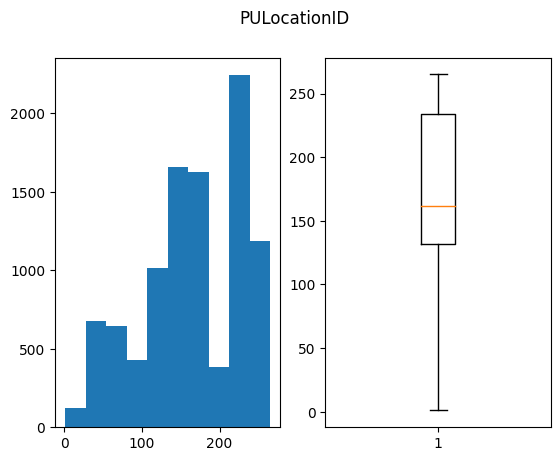

Mode= 132
Mean= 164.5924
Median= 162.0


Distribución de la variable DOLocationID


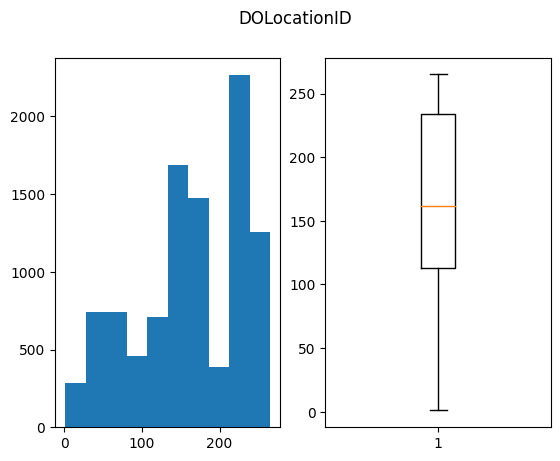

Mode= 236
Mean= 162.1153
Median= 162.0


Distribución de la variable payment_type


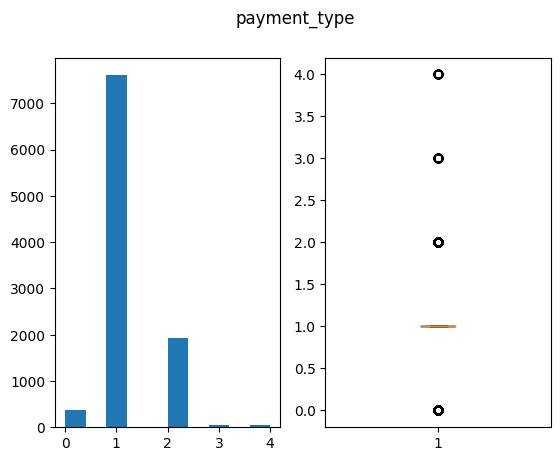

Mode= 1
Mean= 1.1789
Median= 1.0


Distribución de la variable fare_amount


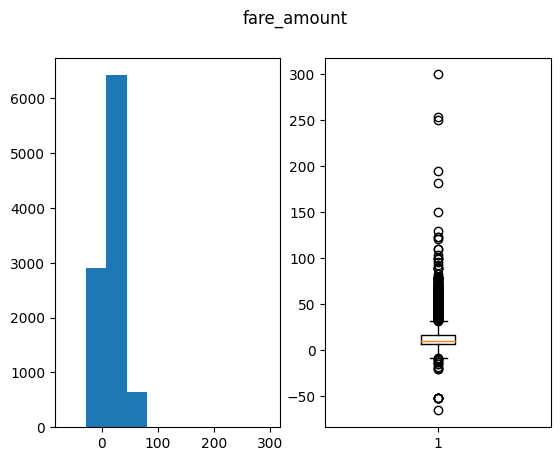

In [37]:
import statistics as stat

numerics = df_subset.drop("store_and_fwd_flag", axis= 1)


for elem in numerics.columns:
  print(f"Distribución de la variable {elem}")
  
  # Graficos de histograma y cajas
  fig, axes = plt.subplots(nrows=1, ncols=2)
  fig.suptitle(elem)
  axes[0].hist(numerics[elem])
  axes[1].boxplot(x=elem, data=numerics)
  plt.show()

  # Moda, media y mediana
  mode=stat.mode(numerics[elem])
  print (f"Mode= {mode}")
  print (f"Mean= {numerics[elem].mean()}")
  print (f"Median= {numerics[elem].median()}", end = "\n\n\n")
